# Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Exercise: 1
Load a dataset and prepare the data for linear regression (e.g., split into training and testing sets).

In [3]:
# Loading the Boston Housing dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT", "MEDV"
]
boston_df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Spliting the data into training and testing sets

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exercise: 2
Implement linear regression using Scikit-Learn. Fit the model to the training data.

In [8]:
lr = LinearRegression()

In [9]:
# Fiting the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Exercise: 3
Predict the target variable for the test set using the fitted linear regression model.

In [10]:
# Predict the target variable for the test set
y_pred = lr.predict(X_test)

## Exercise: 4
Calculate the Mean Squared Error (MSE) of the linear regression model on the test
set.

In [11]:
mse = mean_squared_error(y_test, y_pred)

In [12]:
print('Mean Squared Error: ',mse)

Mean Squared Error:  24.291119474973478


## Exercise: 5
Calculate the R-squared value of the linear regression model on the test set.

In [13]:
# Calculate the R-squared Value
r2 = r2_score(y_test, y_pred)

In [15]:
print('Root Squared Value is: ',r2)

Root Squared Value is:  0.6687594935356326


## Exercise: 6
 Plot the regression line along with the actual data points to visually assess the model's
performance.

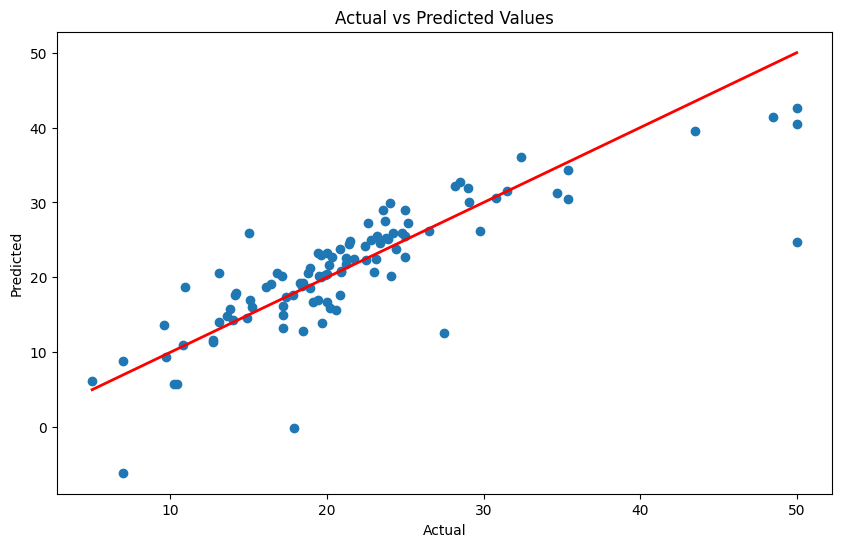

In [16]:
# Plotting is usually done for simple linear regression with one feature,
# but for demonstration, we can plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

## Exercise: 7
Evaluate the model's performance by comparing the predicted values with the actual values. Create a scatter plot of the predicted vs. actual values.

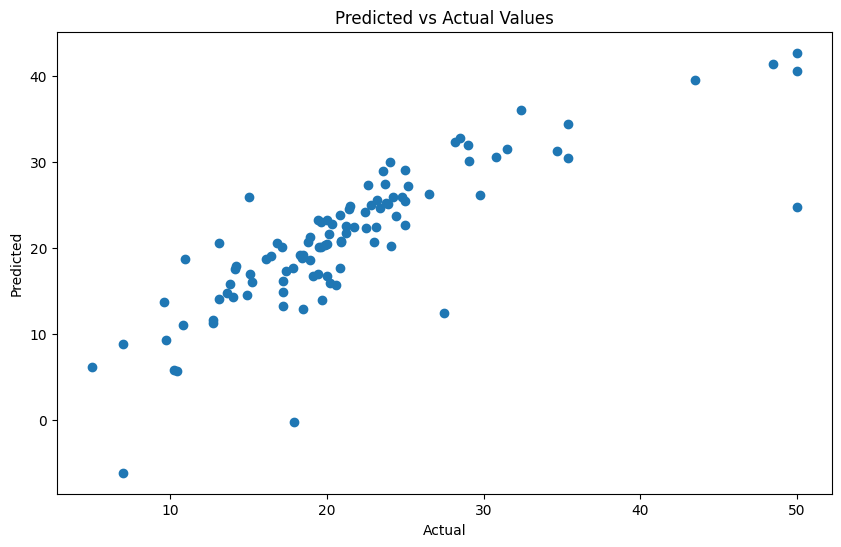

In [17]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()


## Exercise: 8
Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [18]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

(mse, r2, coefficients)

(24.291119474973478,
 0.6687594935356326,
          Coefficient
 CRIM       -0.113056
 ZN          0.030110
 INDUS       0.040381
 CHAS        2.784438
 NOX       -17.202633
 RM          4.438835
 AGE        -0.006296
 DIS        -1.447865
 RAD         0.262430
 TAX        -0.010647
 PTRATIO    -0.915456
 B           0.012351
 LSTAT      -0.508571)